# **Assignment 1**

## Downloading and preparing the data



In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

df.head(10)

,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,-23,0,39,-4,28.641509
1,168,0,39,181,27.880597
2,231,0,39,244,27.852941
3,150,17,39,143,27.826087
4,965,35,51,947,42.029412
5,33,19,46,30,38.970588
6,75,26,46,63,38.840580
7,58,15,46,52,34.059701
8,904,35,46,888,34.102941
9,141,12,46,140,34.000000


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##Creating the model

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()
#https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Grid search


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.5],
}
#https://www.kaggle.com/code/tilii7/hyperparameter-grid-search-with-xgboost
#https://xgboost.readthedocs.io/en/stable/python/python_intro.html#setting-parameters

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.9913923928823276


## Training the model

In [ ]:
best_xgb = xgb.XGBRegressor(max_depth=best_params['max_depth'])

best_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Making predictions


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 11.112474873525287
Mean Squared Error: 228.74529592486687
R-squared: 0.9923291209653153


##Visualizing the predictions


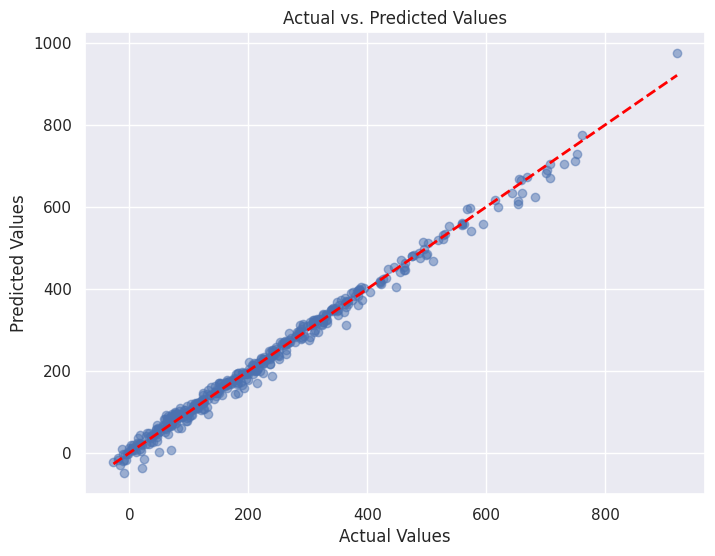

In [ ]:
# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

# Sources:

https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html
https://www.kaggle.com/code/tilii7/hyperparameter-grid-search-with-xgboost
https://xgboost.readthedocs.io/en/stable/python/python_intro.html#setting-parameters